#  Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disaster-tweets/tweets.csv


In [2]:
# Read the data from CSV

df = pd.read_csv('../input/disaster-tweets/tweets.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [4]:
# Check the frequency of values in the 'keyword' column

df['keyword'].value_counts()

thunderstorm     93
flattened        88
mass%20murder    86
stretcher        86
drown            83
                 ..
electrocuted     16
rainstorm        11
siren            10
deluged          10
tsunami           6
Name: keyword, Length: 219, dtype: int64

In [5]:
# Check for missing values in the dataframe

df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
df.shape

(11370, 5)

In [7]:
# Drop the 'location' column from the dataframe

df = df.drop(columns=['location'])

In [8]:
# Remove duplicate rows from the dataframe

df.drop_duplicates(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11370 non-null  int64 
 1   keyword  11370 non-null  object
 2   text     11370 non-null  object
 3   target   11370 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 444.1+ KB


In [10]:
import re

In [11]:
# Define a function to clean the text

def text_cleaner(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'http\S+', '', text) # remove URLs starting with http
    text = re.sub(r'www\S+', '', text) # remove URLs starting with www
    text = re.sub(r'pic.twitter.com\S+', '', text) # remove pic.twitter.com URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r'#', '', text) # remove hashtags
    return text


In [12]:
df['new'] = df['text'].apply(text_cleaner)

In [13]:
df.head()

,id,keyword,text,target,new
0,0,ablaze,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...
1,1,ablaze,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...
2,2,ablaze,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
3,3,ablaze,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
4,4,ablaze,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...


In [14]:
# Example of a cleaned text

df['new'][3]

'arsonist sets cars ablaze at dealership '

In [15]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Define a function to remove stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [17]:
df['new'] = df['text'].apply(remove_stopwords)

In [18]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [19]:
df['new'] = df['text'].apply(tokenize_text)

In [20]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

In [21]:
df['new'] = df['text'].apply(lemmatize_text)

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


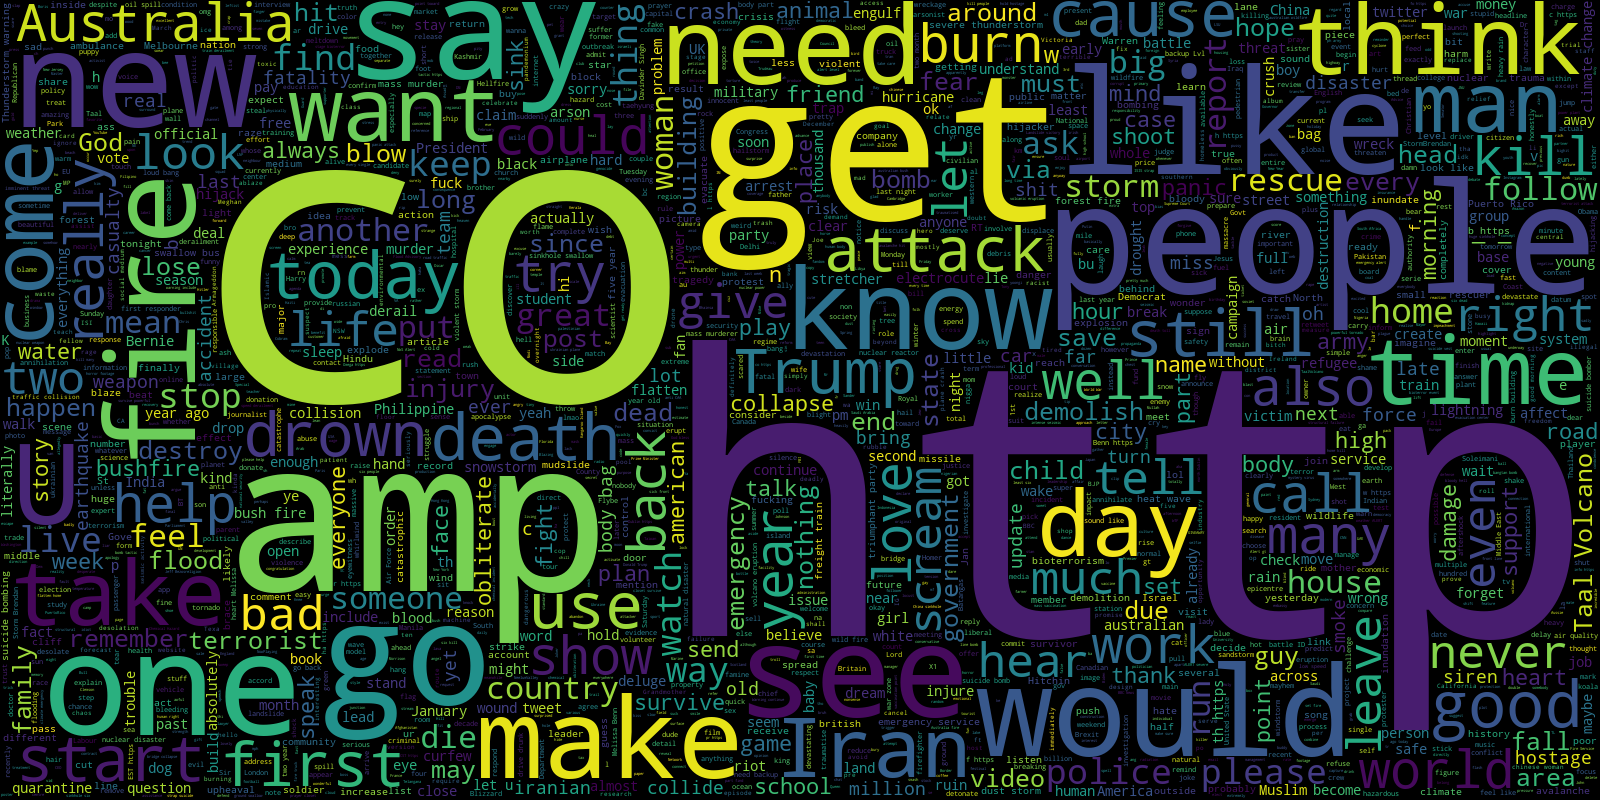

<Figure size 2000x2000 with 0 Axes>

In [24]:
plt.figure(figsize=(20, 20))
WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(df['new'])).to_image()


In [25]:
# Split data into training and test sets

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['new'], df['target'], test_size=0.3, random_state=2)

# Create a CountVectorizer object and fit it on the training data
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [27]:
# Initialize the Logistic Regression model

model = LogisticRegression(C=2)

# Train the model on the training data

model.fit(X_train_vec, y_train)

# Predict the target values for the test data

predicted_value = model.predict(X_test_vec)

# Calculate the ROC AUC score
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.78122604140046


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings

# ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# set up the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

# define the hyperparameters to search over
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1,1), (1,2), (2,2)],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1, 10]
}

# define the grid search object
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search object to the training data
grid.fit(X_train, y_train)

# get the best estimator
best_estimator = grid.best_estimator_

# use the best estimator to make predictions on the testing data
y_pred = best_estimator.predict(X_test)

# calculate the accuracy score
accuracy_score = roc_auc_score(y_test, y_pred)

# print the accuracy score
print("Accuracy Score:", accuracy_score)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

Accuracy Score: 0.8091945844852821


In [29]:
import xgboost as xgb

# Convert training and test data to DMatrix format
dtrain = xgb.DMatrix(X_train_vec, label=y_train)
dtest = xgb.DMatrix(X_test_vec, label=y_test)

# Define XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Train the XGBoost classifier
model = xgb.train(params, dtrain)

# Predict on test data
predicted_value = model.predict(dtest)

# Evaluate performance using ROC AUC score
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)


0.7618645888994727
